In [2]:
import pandas as pd
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

### modify 224 resize

In [ ]:
path = '../data/train/'
files = [os.path.join(path, file) for file in os.listdir(path) if 'modify' not in file]
files = sorted(files)

for f in files:
    np.save(os.path.join('../data/train_modify', f.split('/')[-1]), cv2.resize(np.load(f, allow_pickle=True), (224, 224)))

In [14]:
path = '../data/test/'
files = [os.path.join(path, file) for file in os.listdir(path) if 'modify' not in file]
files = sorted(files)

for f in files:
    np.save(os.path.join('../data/test_modify', f.split('/')[-1]), cv2.resize(np.load(f, allow_pickle=True), (224, 224)))

### 1 channel split

In [153]:
data_path = [os.path.join(path, i) for i in os.listdir(path) if 'modify' in i]
data_path = np.array(sorted(data_path))

In [158]:
path = '../data/train/'
files = [os.path.join(path, file) for file in os.listdir(path)]

for idx, file in tqdm(enumerate(files)):
    temp = np.load(file, allow_pickle=True).astype(np.float32)
    file_modify = file.replace('train_', 'train_modify_')

    np.save(file_modify.replace('train/', 'train_split/').replace('.npy', '_0.npy'), temp[:, :, :2])
    np.save(file_modify.replace('train/', 'train_split/').replace('.npy', '_1.npy'), temp[:, :, 1:3])
    np.save(file_modify.replace('train/', 'train_split/').replace('.npy', '_2.npy'), temp[:, :, 2:4])
    np.save(file_modify.replace('train/', 'train_split/').replace('.npy', '_3.npy'), temp[:, :, 3:])

62735it [02:45, 379.29it/s]


In [159]:
len(os.listdir('../data/train_split'))

250940

### metrics cal

In [11]:
path = '../data/train'
data_path = [os.path.join(path, i) for i in os.listdir(path)]
data_path = np.array(sorted(data_path))

kf = KFold(n_splits=5, random_state=0, shuffle=True)
n_splits = [[trn_idx, val_idx] for trn_idx, val_idx in kf.split(data_path)]
fold_ind=0

train_path = data_path[n_splits[fold_ind][0]]
valid_path = data_path[n_splits[fold_ind][1]]

In [12]:
val_target = [np.load(f, allow_pickle=True) for f in valid_path]
val_target = np.array(val_target)
val_pred = np.load('../submit/oof_rsp_weight.npy', allow_pickle=True)
val_pred = np.where(val_pred>0, val_pred, 0).astype(int)
val_pred = np.squeeze(val_pred)

In [13]:
mean_absolute_error(val_target[:, :, :, 4].reshape(-1), val_pred.reshape(-1))

2.904668734447367

In [16]:
mae = []
for idx in [[67, 28], [64, 46], [69, 57], [66, 62], [64, 68], [71, 70], [87, 56]]:
    mae += [mean_absolute_error(val_target[:, idx[0], idx[1], 4].reshape(-1), val_pred[:, idx[0], idx[1]].reshape(-1))]
np.mean(mae)

9.435049926561842

In [6]:
from sklearn.model_selection import KFold

data_path
kf = KFold(n_splits=5, random_state=0, shuffle=True)
n_splits = [[trn_idx, val_idx] for trn_idx, val_idx in kf.split(data_path)]
fold_ind=0

data_path = data_path[n_splits[fold_ind][1]]

In [48]:
data = [np.load(sp, allow_pickle=True) for sp in data_path[:20]]
data = np.array(data)
data.shape

(62735, 120, 120, 5)

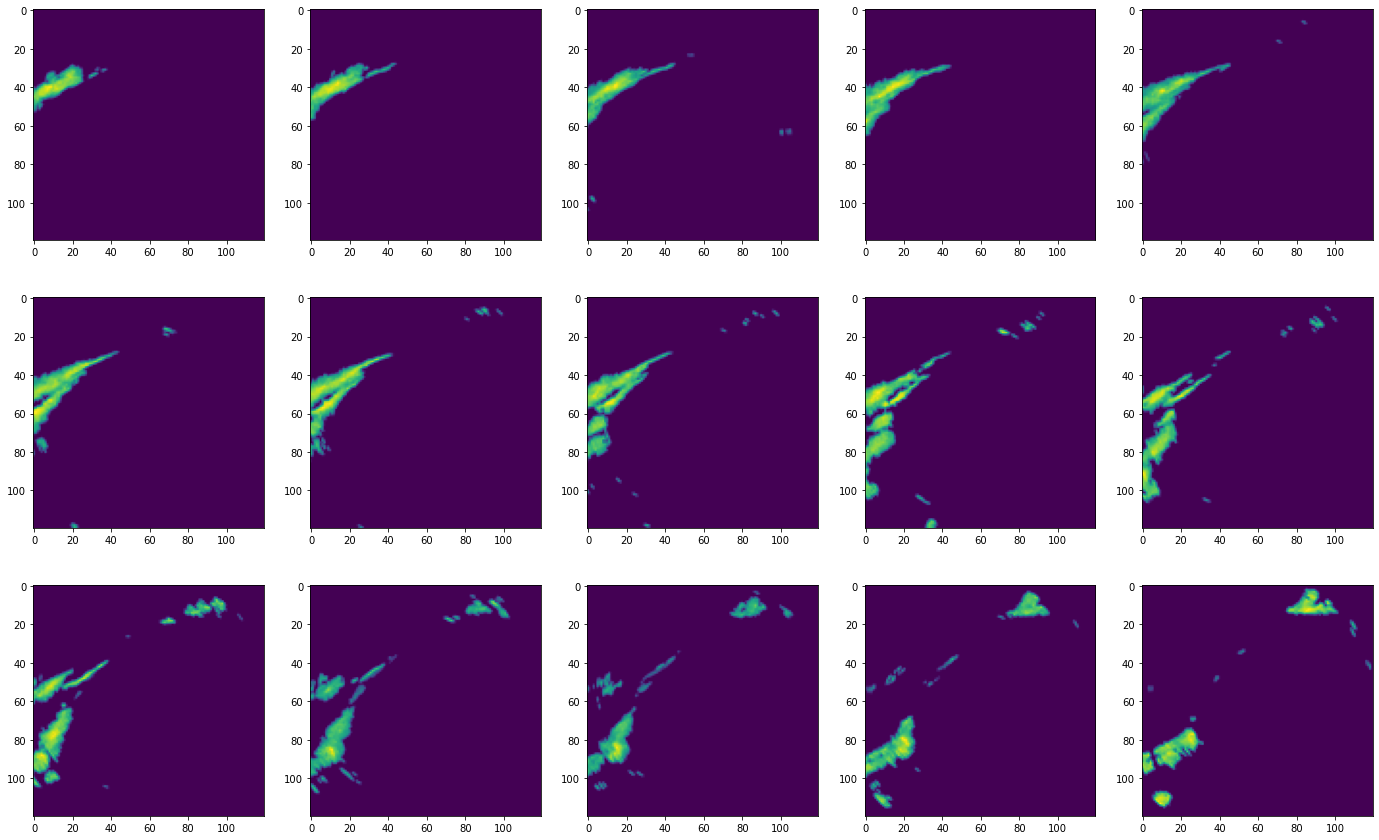

In [39]:
fig, axes = plt.subplots( 3,5 , figsize=(24, 5 *3))

counter = 0 
for row_ind in range(3):
    for col_ind in range(5):
        axes[row_ind][col_ind].imshow(   data[counter, :, :, 4] )
        counter += 1

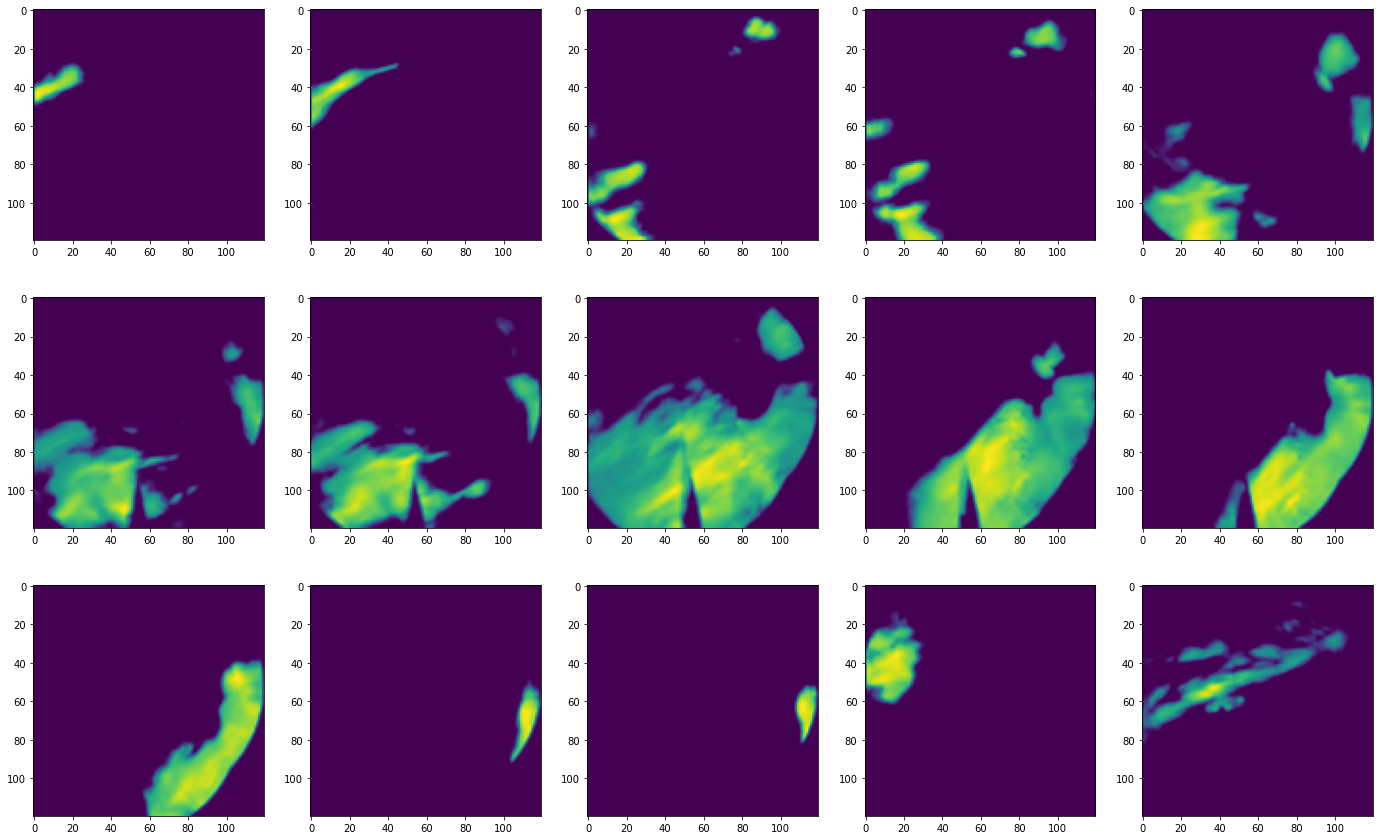

In [30]:
preds = np.load('../submit/oof_224_120.npy', allow_pickle=True)
preds = np.squeeze(preds)
fig, axes = plt.subplots( 3,5 , figsize=(24, 5 *3))

counter = 0 
for row_ind in range(3):
    for col_ind in range(5):
        axes[row_ind][col_ind].imshow(   preds[counter, :, :] )
        counter += 1

In [239]:
data_path = [os.path.join('../data/test', sl) for sl in sorted(os.listdir('../data/test'))]
data = np.expand_dims(np.concatenate([np.expand_dims(np.load(sp, allow_pickle=True)[:, :, 3], 0) for sp in data_path]), -1)

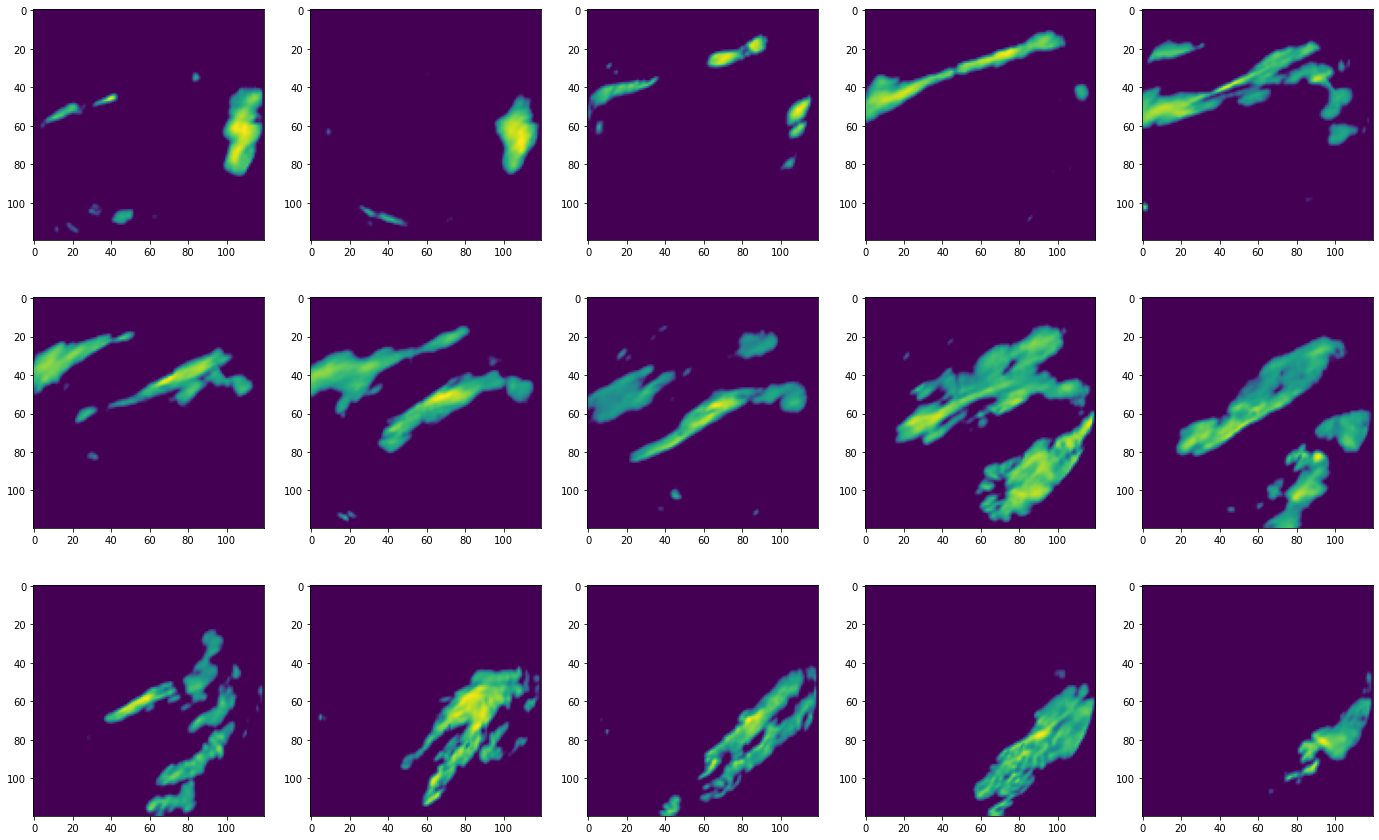

In [57]:
fold0_preds = np.load('../submit/folds_0_test_224_120.npy', allow_pickle=True)
fold0_preds = np.squeeze(fold0_preds)
fold0_preds = np.where(fold0_preds>0, fold0_preds, 0)
fold0_preds = fold0_preds.astype(int)
fig, axes = plt.subplots( 3,5 , figsize=(24, 5 *3))

counter = 0 
for row_ind in range(3):
    for col_ind in range(5):
        axes[row_ind][col_ind].imshow(   fold0_preds[counter, :, :] )
        counter += 1

In [24]:
sub = pd.read_csv('../data/sample_submission.csv')
sub.iloc[:, 1:] = fold0_preds.reshape(-1, 120*120)
sub.to_csv('../submit_csv/baseline_224_120.csv', index=False)

In [25]:
sub.head()

,file_name,0,1,2,3,4,5,6,7,8,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,test_00000.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,test_00001.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,test_00002.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,test_00003.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,test_00004.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [221]:
data[:, -5:, -5:5].sum()

0

In [5]:
data_path = [os.path.join('../data/test', sl) for sl in sorted(os.listdir('../data/test'))]
data = np.concatenate([np.expand_dims(np.load(sp, allow_pickle=True)[:, :, 3], 0) for sp in data_path])

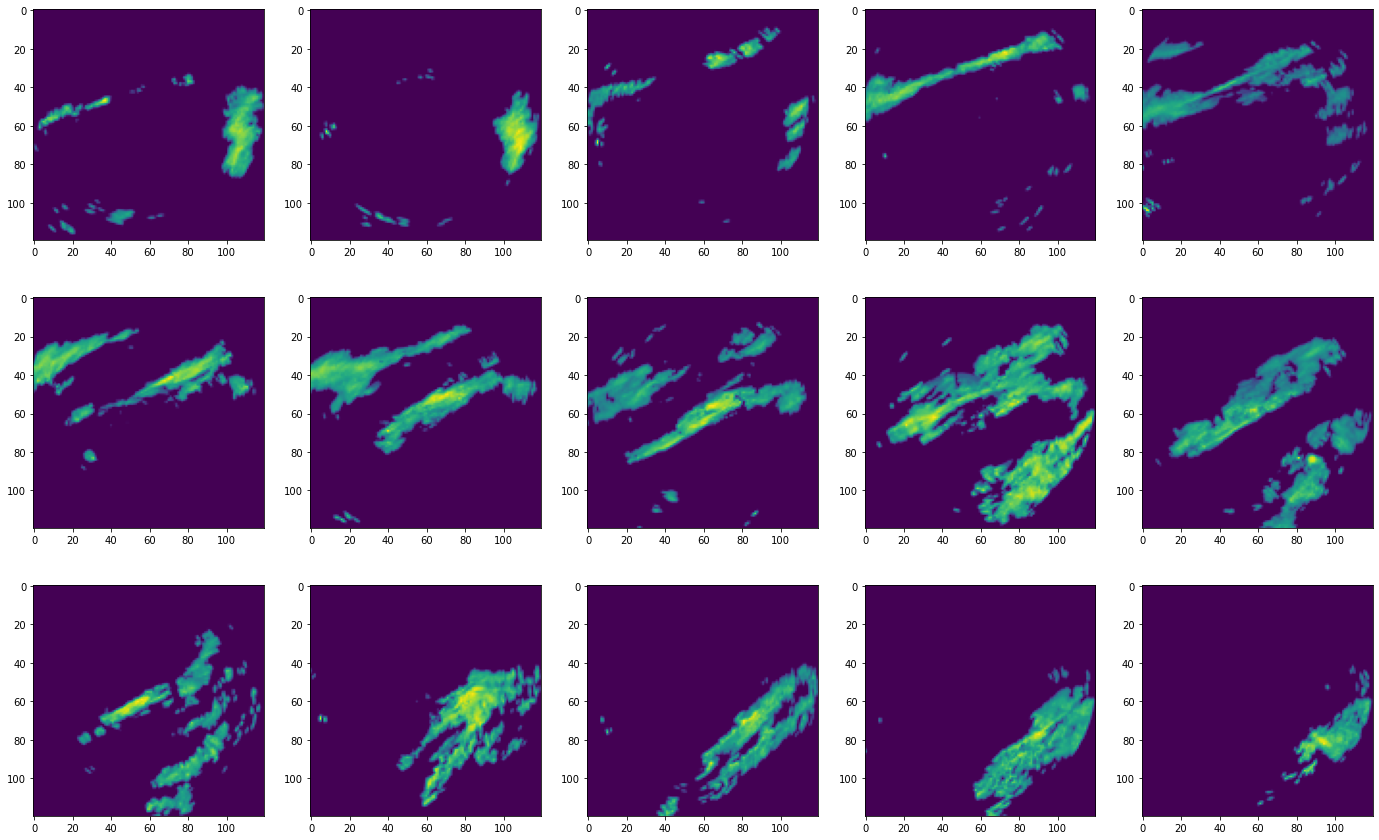

In [6]:
fig, axes = plt.subplots( 3,5 , figsize=(24, 5 *3))

counter = 0 
for row_ind in range(3):
    for col_ind in range(5):
        axes[row_ind][col_ind].imshow(   data[counter, :, :] )
        counter += 1

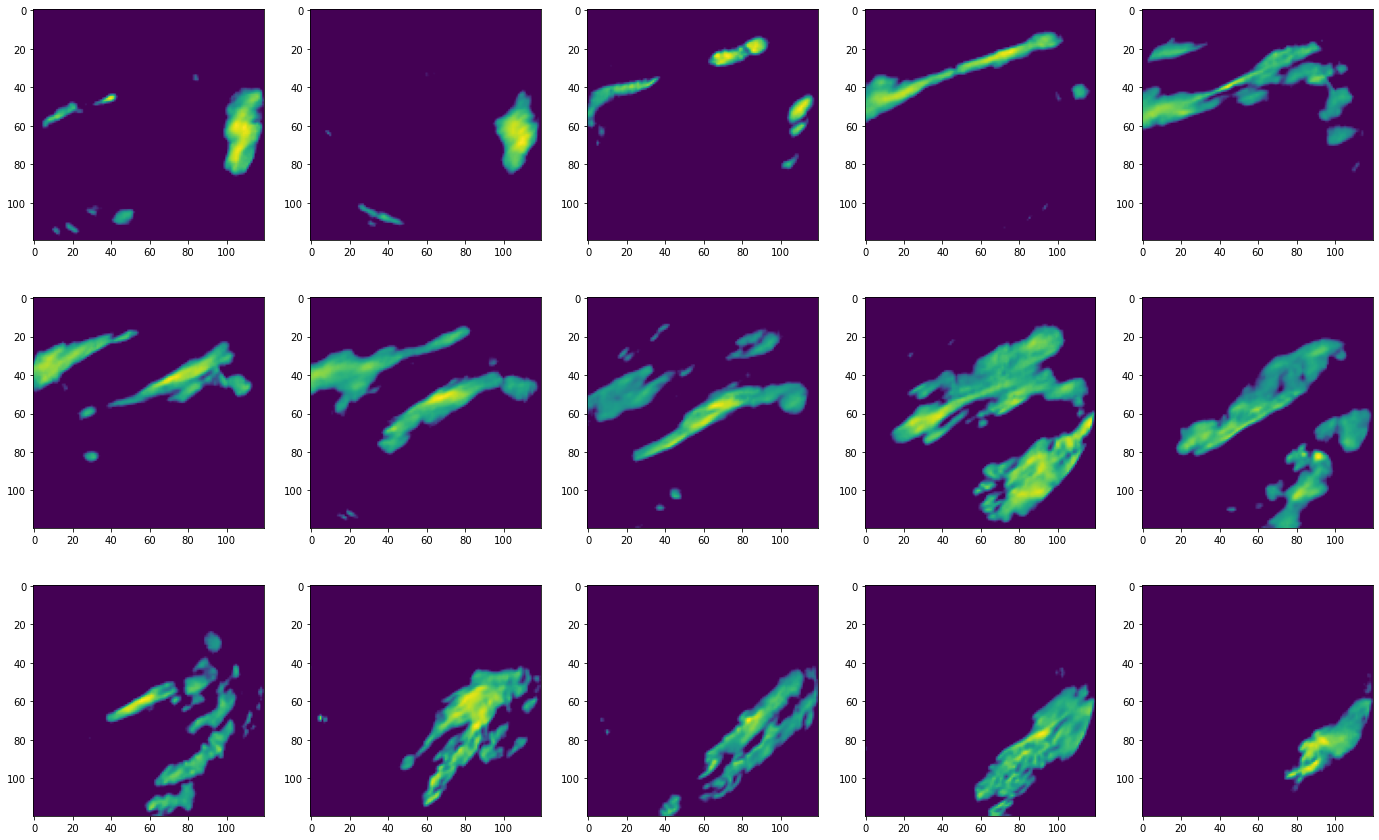

In [27]:
fold0_preds = np.load('../submit/folds5_rsp.npy', allow_pickle=True)
fold0_preds = np.squeeze(fold0_preds)
fold0_preds = np.where(fold0_preds>0, fold0_preds, 0)
fold0_preds = fold0_preds.astype(int)
fig, axes = plt.subplots( 3,5 , figsize=(24, 5 *3))

counter = 0 
for row_ind in range(3):
    for col_ind in range(5):
        axes[row_ind][col_ind].imshow(   fold0_preds[counter, :, :] )
        counter += 1

In [28]:
sub = pd.read_csv('../data/sample_submission.csv')
sub.iloc[:, 1:] = fold0_preds.reshape(-1, 120*120)
sub.to_csv('../submit_csv/baseline_rsp.csv', index=False)

In [29]:
sub.head()

,file_name,0,1,2,3,4,5,6,7,8,...,14390,14391,14392,14393,14394,14395,14396,14397,14398,14399
0,test_00000.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,test_00001.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,test_00002.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,test_00003.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,test_00004.npy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
